In [1]:
import pandas as pd
import itertools
import numpy as np


Mn_vals = [10, 20, 30, 40, 50, 60, 70]
DMSO_vals = [0, 5, 10]
Anneal_T_vals = [60, 80, 100]

# Constants
Spin_rpm = 300
Anneal_time_min = 15
Raman_quinoid_fraction = 0.41
GIWAXS_pi_pi_spacing_A = 3.698


def viscosity_from_Mn(Mn):
    # roughly linear from 6.15 at Mn=10 to 7.05 at Mn=70
    return 6.15 + (Mn - 10) * (7.05 - 6.15) / (70 - 10)


def raman_from_Mn(Mn):
    return 0.41 + (Mn - 10) * (0.47 - 0.41) / (70 - 10)


def pipi_from_Mn(Mn):
    return 3.698 - (Mn - 10) * (3.698 - 3.686) / (70 - 10)


rows = []
for Mn, DMSO, T in itertools.product(Mn_vals, DMSO_vals, Anneal_T_vals):
    visc = round(viscosity_from_Mn(Mn), 2)
    raman = round(raman_from_Mn(Mn), 2)
    pipi = round(pipi_from_Mn(Mn), 3)

    
    cond_base = 50 + 0.4 * Mn + 0.2 * DMSO + 0.05 * (T - 60)
    cond = round(cond_base + np.random.normal(0, 0.5), 1)  # small noise

    rows.append([
        "Low", Mn, DMSO, Spin_rpm, T, Anneal_time_min,
        visc, raman, pipi, cond
    ])


cols = [
    "Fidelity", "Mn_kg_per_mol", "DMSO_wt_pct", "Spin_rpm",
    "Anneal_T_C", "Anneal_time_min", "Viscosity_mPa_s",
    "Raman_quinoid_fraction", "GIWAXS_pi_pi_spacing_A",
    "Conductivity_S_per_cm"
]
df_low = pd.DataFrame(rows, columns=cols)


print(df_low.to_string(index=False))
df_low.to_csv("LowFidelity_Factorial.csv", index=False)
print("\n Saved as LowFidelity_Factorial.csv")


Fidelity  Mn_kg_per_mol  DMSO_wt_pct  Spin_rpm  Anneal_T_C  Anneal_time_min  Viscosity_mPa_s  Raman_quinoid_fraction  GIWAXS_pi_pi_spacing_A  Conductivity_S_per_cm
     Low             10            0       300          60               15             6.15                    0.41                   3.698                   54.8
     Low             10            0       300          80               15             6.15                    0.41                   3.698                   54.6
     Low             10            0       300         100               15             6.15                    0.41                   3.698                   55.6
     Low             10            5       300          60               15             6.15                    0.41                   3.698                   55.4
     Low             10            5       300          80               15             6.15                    0.41                   3.698                   55.8
     Low        

## VISUALISATION OF DATA


Dataset Shape: (69, 10)

Columns:
 ['Fidelity', 'Mn_kg_per_mol', 'DMSO_wt_pct', 'Spin_rpm', 'Anneal_T_C', 'Anneal_time_min', 'Viscosity_mPa_s', 'Raman_quinoid_fraction', 'GIWAXS_pi_pi_spacing_A', 'Conductivity_S_per_cm']

First 5 rows:
  Fidelity  Mn_kg_per_mol  DMSO_wt_pct  Spin_rpm  Anneal_T_C  Anneal_time_min  \
0      Low             10            0       300          60               15   
1      Low             10            0       300          80               15   
2      Low             10            0       300         100               15   
3      Low             10            5       300          60               15   
4      Low             10            5       300          80               15   

   Viscosity_mPa_s  Raman_quinoid_fraction  GIWAXS_pi_pi_spacing_A  \
0             6.15                    0.41                   3.698   
1             6.15                    0.41                   3.698   
2             6.15                    0.41                   3.698

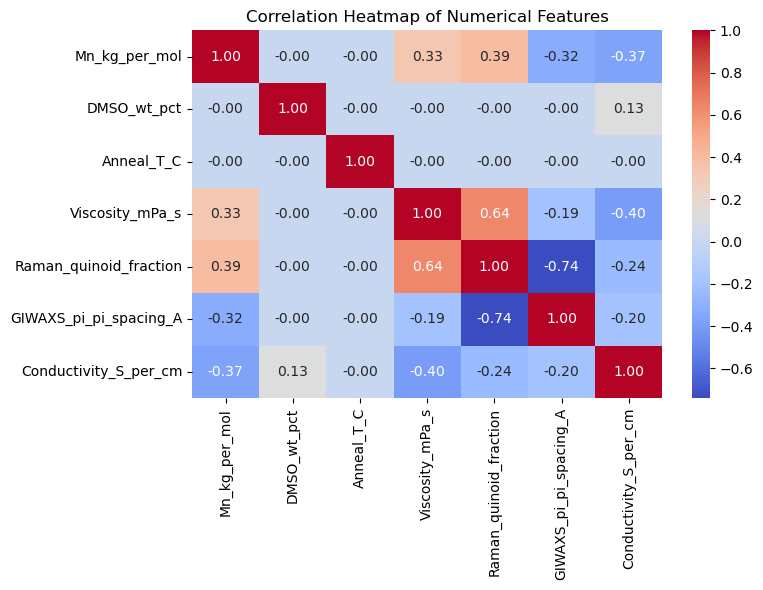

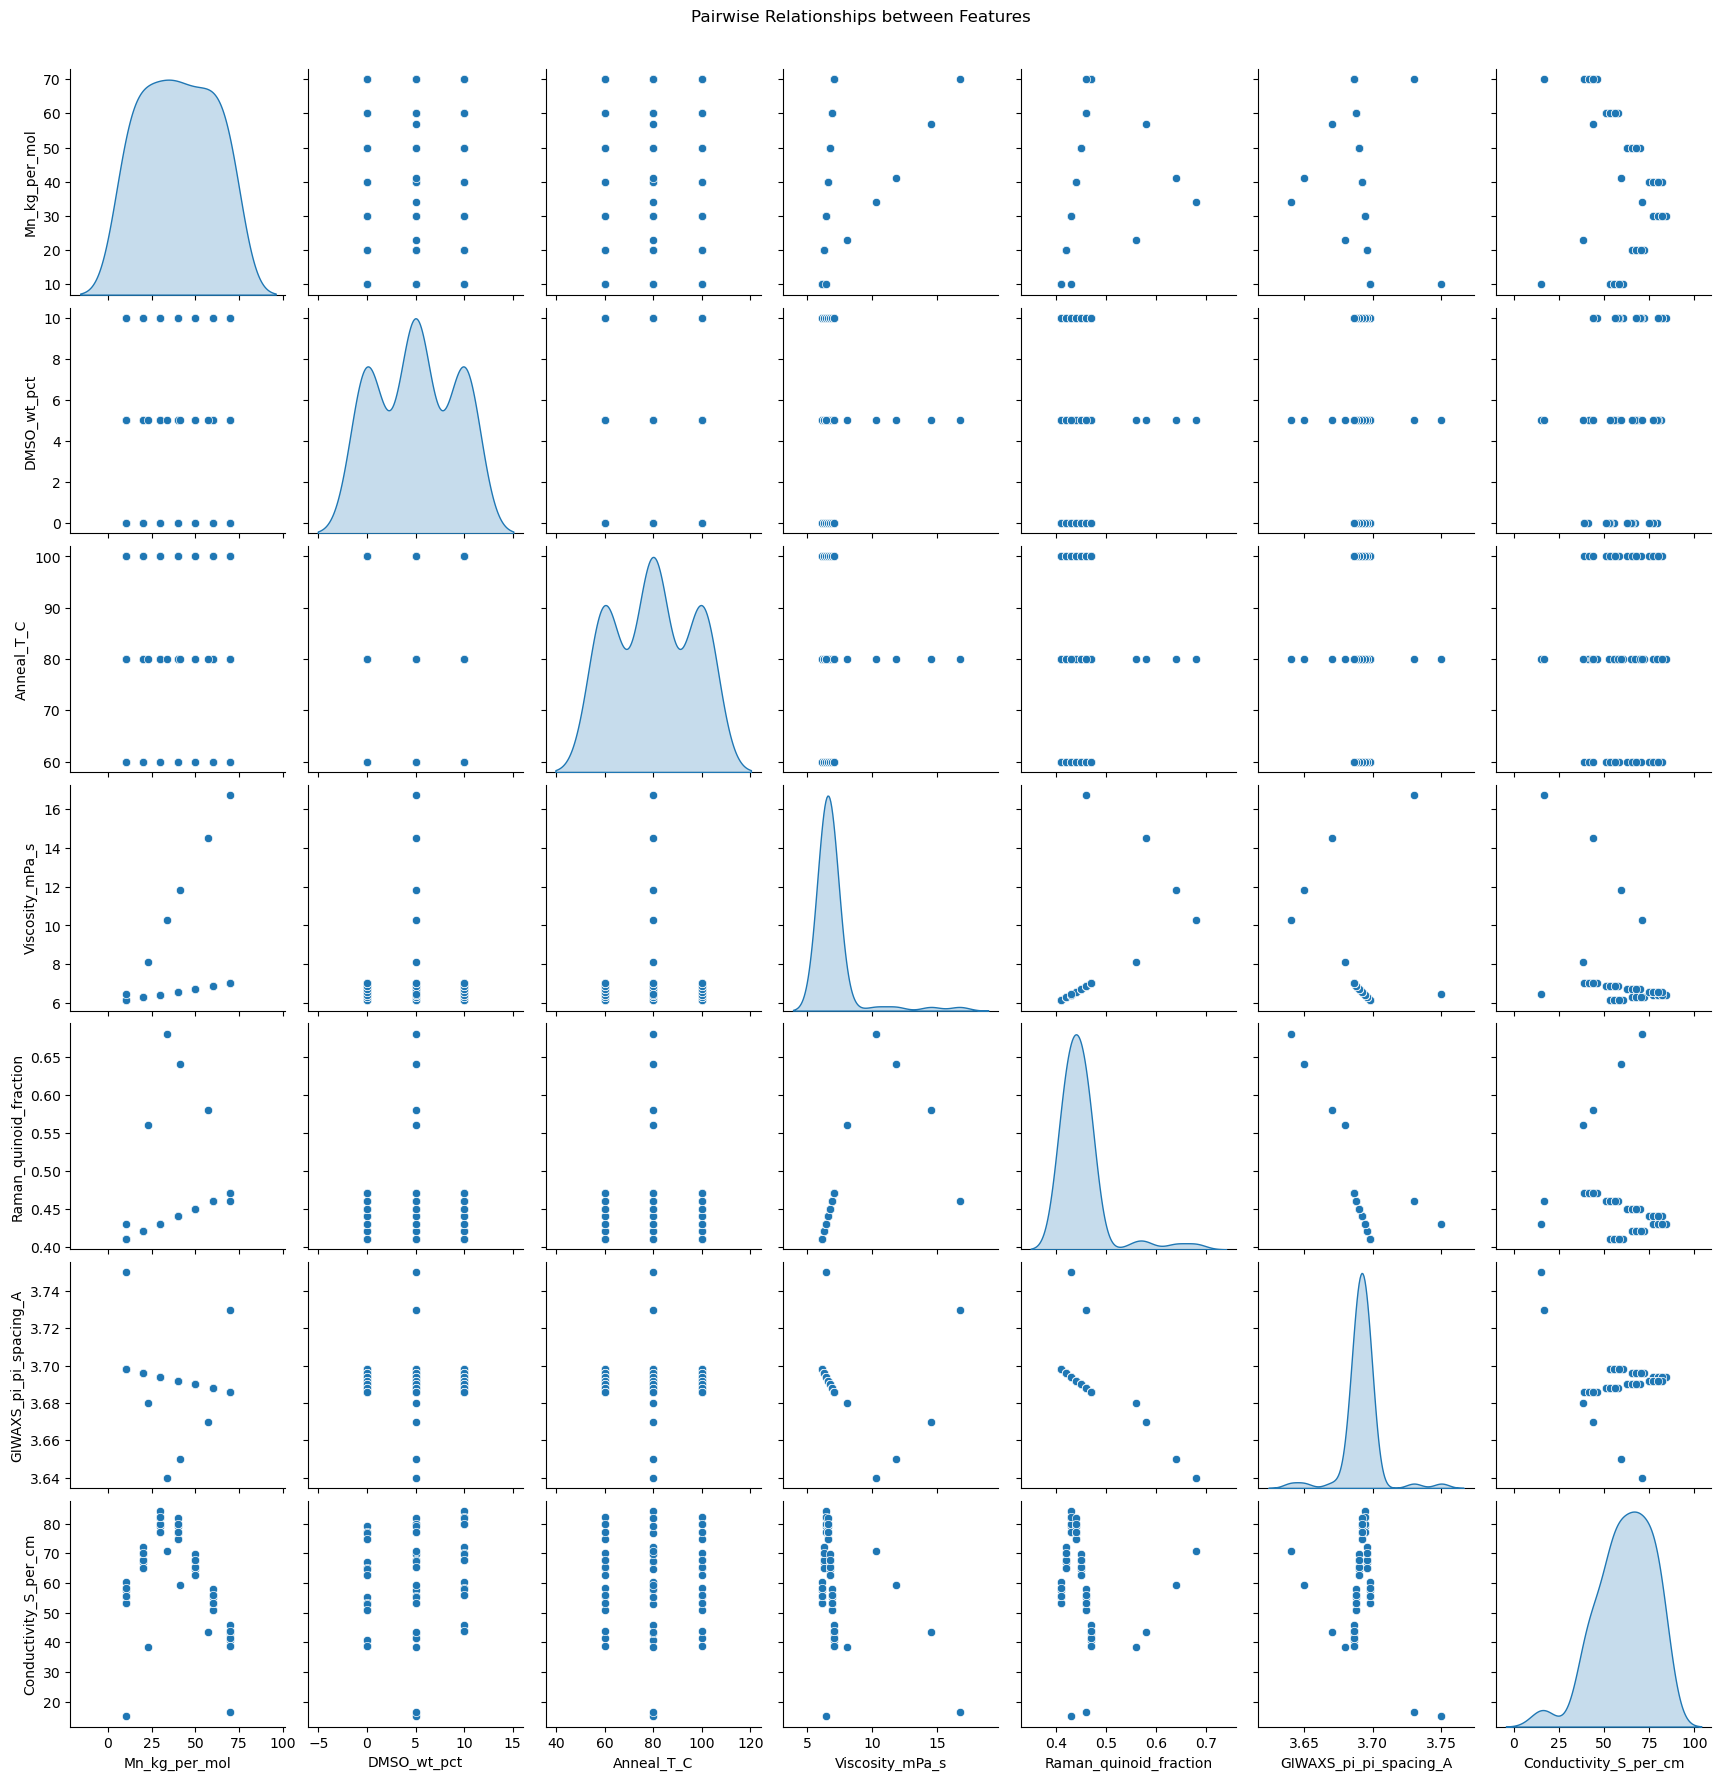

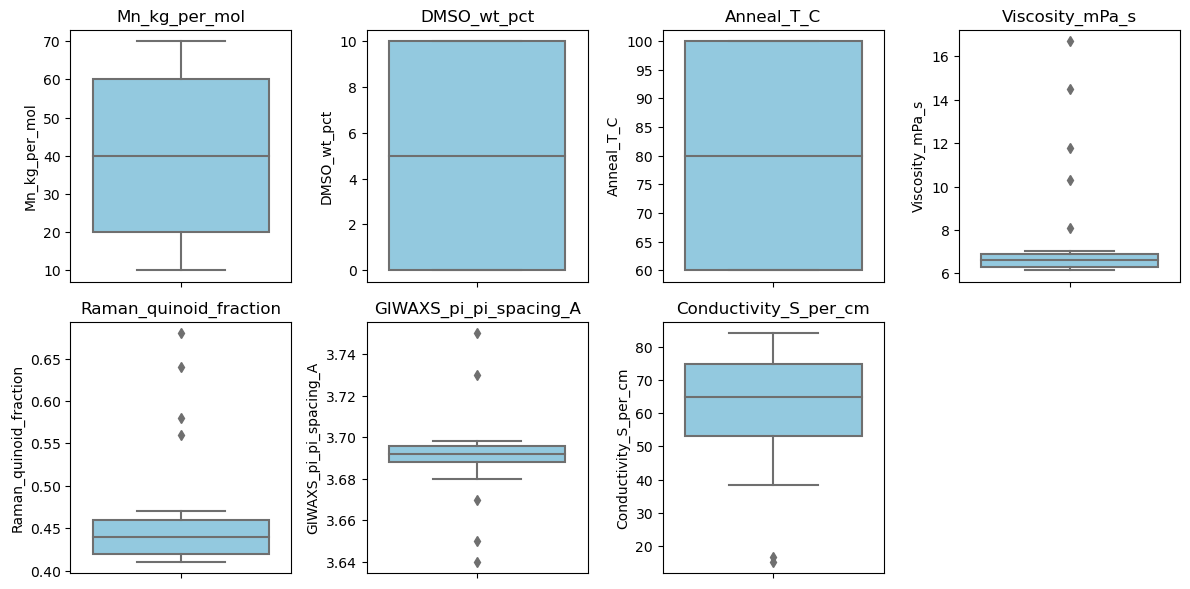

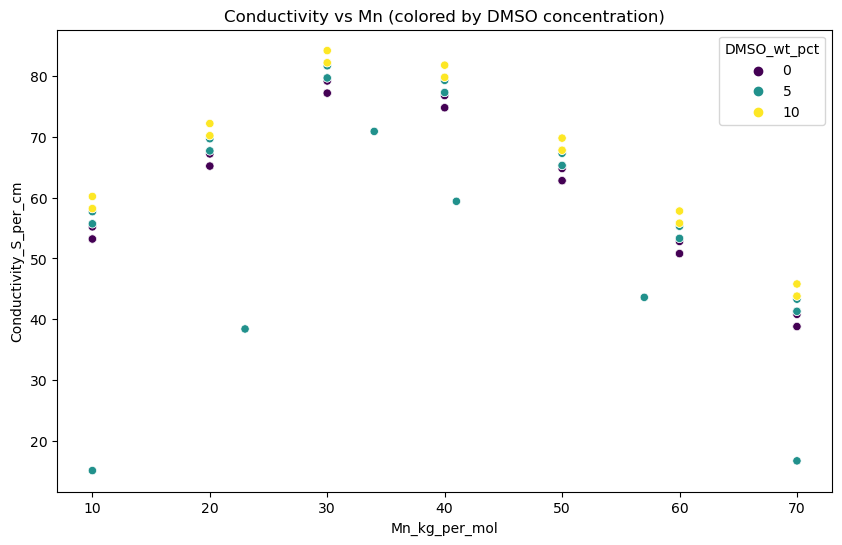

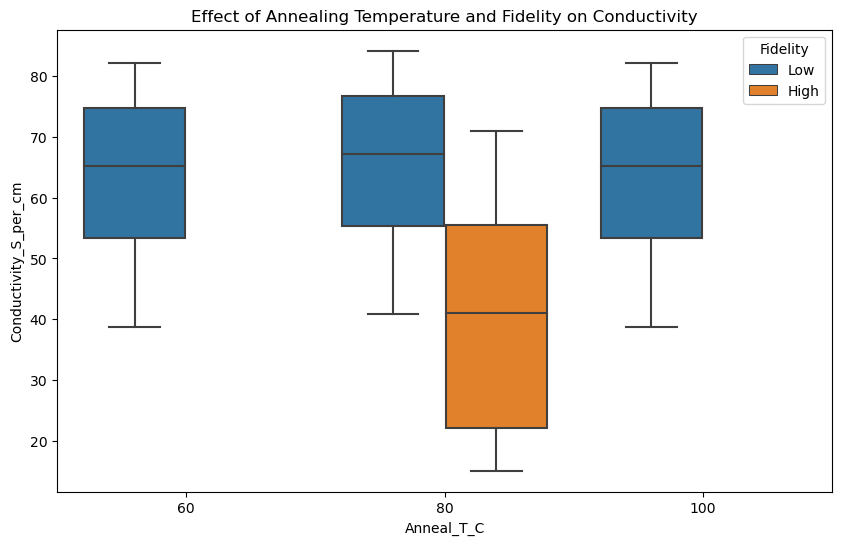

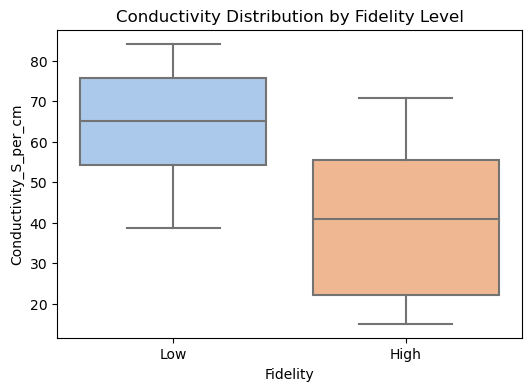

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Amrita\SEM1\Maths\project\Dataset\PEDOT_PSS_Multi_Fidelity_BO_Dataset.csv")

print("\nDataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# 2. Data Overview
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())

# 3. Five-Point Summary
print("\n Descriptive Statistics (Numerical columns):")
desc = df.describe().T
print(desc[["min", "25%", "50%", "75%", "max"]])



num_df = df.select_dtypes(include=[np.number])


num_df = num_df.loc[:, num_df.nunique(dropna=True) > 1]
num_df = num_df.dropna(axis=1, how='all')

print("\nColumns included in numeric analysis:", num_df.columns.tolist())


# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# 5. Pairplot to visualize interactions
sns.pairplot(num_df, diag_kind='kde')
plt.suptitle("Pairwise Relationships between Features", y=1.02)
plt.show()

# 6. Boxplots 
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(2, int(np.ceil(len(num_df.columns)/2)), i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 7. Distribution of Conductivity vs Key Features
if 'Mn_kg_per_mol' in num_df.columns and 'Conductivity_S_per_cm' in num_df.columns and 'DMSO_wt_pct' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Mn_kg_per_mol', y='Conductivity_S_per_cm', hue='DMSO_wt_pct', palette='viridis')
    plt.title("Conductivity vs Mn (colored by DMSO concentration)")
    plt.show()

if 'Anneal_T_C' in df.columns and 'Conductivity_S_per_cm' in num_df.columns and 'Fidelity' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='Anneal_T_C', y='Conductivity_S_per_cm', hue='Fidelity')
    plt.title("Effect of Annealing Temperature and Fidelity on Conductivity")
    plt.show()

# 8. Fidelity-level comparison
if 'Fidelity' in df.columns and 'Conductivity_S_per_cm' in num_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Fidelity', y='Conductivity_S_per_cm', palette='pastel')
    plt.title("Conductivity Distribution by Fidelity Level")
    plt.show()


## PREDICTION MODEL

In [4]:
pip install numpy pandas scikit-learn matplotlib seaborn joblib xgboost shap tensorflow==2.12.0


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install scikit-optimize


In [3]:
import os, sys, math, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from skopt import Optimizer
from skopt.space import Real, Integer
import warnings
warnings.filterwarnings("ignore")

In [4]:
RND = 42
np.random.seed(RND)

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Amrita\SEM1\Maths\project\Dataset\PEDOT_PSS_Multi_Fidelity_BO_Dataset.csv")
ARTIFACT_DIR = "./artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)



print("Loaded CSV with rows:", len(df))

Loaded CSV with rows: 69


In [5]:


candidate_features = [
    "Mn_kg_per_mol",
    "DMSO_wt_pct",
    "Spin_rpm",
    "Anneal_T_C",
    "Anneal_time_min",
    "Viscosity_mPa_s",
    "Raman_quinoid_fraction",
    "GIWAXS_pi_pi_spacing_A"
]

target_col = "Conductivity_S_per_cm"  


df.columns = [c.strip() for c in df.columns]


features = [f for f in candidate_features if f in df.columns]
if len(features) == 0:
    raise ValueError("No expected features found in CSV. Columns present: " + ", ".join(df.columns))

print("Using features:", features)


df = df.dropna(subset=[target_col]).reset_index(drop=True)
print("Rows after dropping NaN target:", len(df))


Using features: ['Mn_kg_per_mol', 'DMSO_wt_pct', 'Spin_rpm', 'Anneal_T_C', 'Anneal_time_min', 'Viscosity_mPa_s', 'Raman_quinoid_fraction', 'GIWAXS_pi_pi_spacing_A']
Rows after dropping NaN target: 69


In [6]:

for c in features + [target_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")


print("NaNs per column:\n", df[features + [target_col]].isna().sum())


import seaborn as sns

try:
    plt.figure(figsize=(6,3))
    sns.histplot(df[target_col].dropna(), bins=30, log_scale=(False, True))
    plt.title("Conductivity distribution (y-axis log scale)")
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "conductivity_hist.png"))
    plt.close()
except Exception:
    pass


y_vals = df[target_col].values
if np.nanmin(y_vals) > 0 and (np.nanmax(y_vals) / np.nanmin(y_vals) > 50):
    USE_LOG_TARGET = True
else:
    USE_LOG_TARGET = True   

print("USE_LOG_TARGET =", USE_LOG_TARGET)
if USE_LOG_TARGET:
    df["y"] = np.log10(df[target_col].astype(float))
else:
    df["y"] = df[target_col].astype(float)

X_df = df[features].copy()
y = df["y"].values


NaNs per column:
 Mn_kg_per_mol             0
DMSO_wt_pct               0
Spin_rpm                  0
Anneal_T_C                0
Anneal_time_min           0
Viscosity_mPa_s           0
Raman_quinoid_fraction    0
GIWAXS_pi_pi_spacing_A    0
Conductivity_S_per_cm     0
dtype: int64
USE_LOG_TARGET = True


In [7]:

X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=RND)


imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train_df)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(X_test_df)
X_test_scaled = scaler.transform(X_test_imputed)


joblib.dump(imputer, os.path.join(ARTIFACT_DIR, "imputer.joblib"))
joblib.dump(scaler, os.path.join(ARTIFACT_DIR, "scaler.joblib"))
joblib.dump(features, os.path.join(ARTIFACT_DIR, "features.joblib"))


['./artifacts\\features.joblib']

RANDOM FOREST REGRESSOR

In [10]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=3,
    random_state=RND,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


def inv_transform_y(y_arr):
    """Inverse transform log10 target if used"""
    return np.power(10.0, y_arr) if USE_LOG_TARGET else y_arr

def report_metrics(y_true, y_pred, prefix="Model"):
    r2 = r2_score(y_true, y_pred)

    
    rmse = mean_squared_error(y_true, y_pred) ** 0.5

    mae = mean_absolute_error(y_true, y_pred)
    print(f"{prefix} → R2: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return {"r2": r2, "rmse": rmse, "mae": mae}


print("\nRandom Forest performance (log10 scale):")
rf_log_metrics = report_metrics(y_test, y_pred_rf, prefix="RandomForest (log10)")


y_test_orig = inv_transform_y(y_test)
y_pred_rf_orig = inv_transform_y(y_pred_rf)

print("\nRandom Forest performance (actual conductivity scale):")
rf_real_metrics = report_metrics(y_test_orig, y_pred_rf_orig, prefix="RandomForest (real)")


import joblib
joblib.dump(rf, os.path.join(ARTIFACT_DIR, "rf_model.joblib"))



Random Forest performance (log10 scale):
RandomForest (log10) → R2: 0.7297, RMSE: 0.0437, MAE: 0.0294

Random Forest performance (actual conductivity scale):
RandomForest (real) → R2: 0.8132, RMSE: 5.1556, MAE: 3.6451


['./artifacts\\rf_model.joblib']

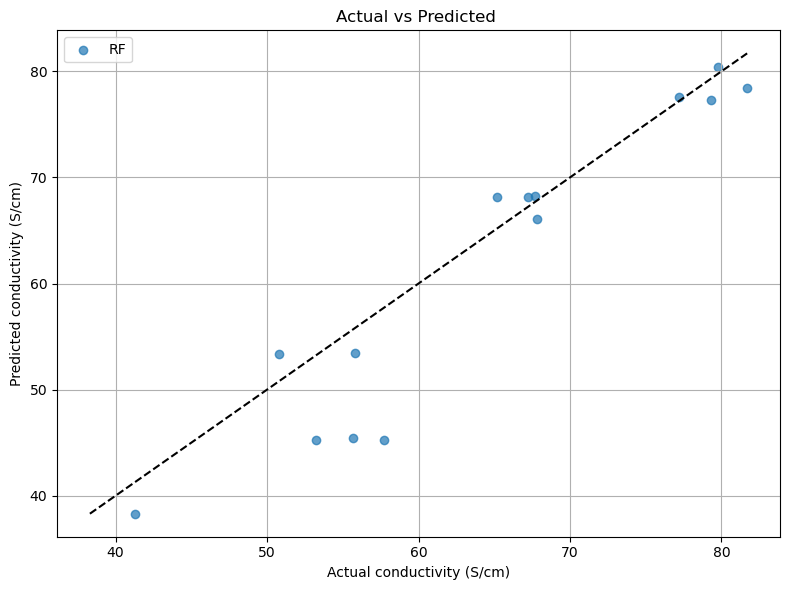

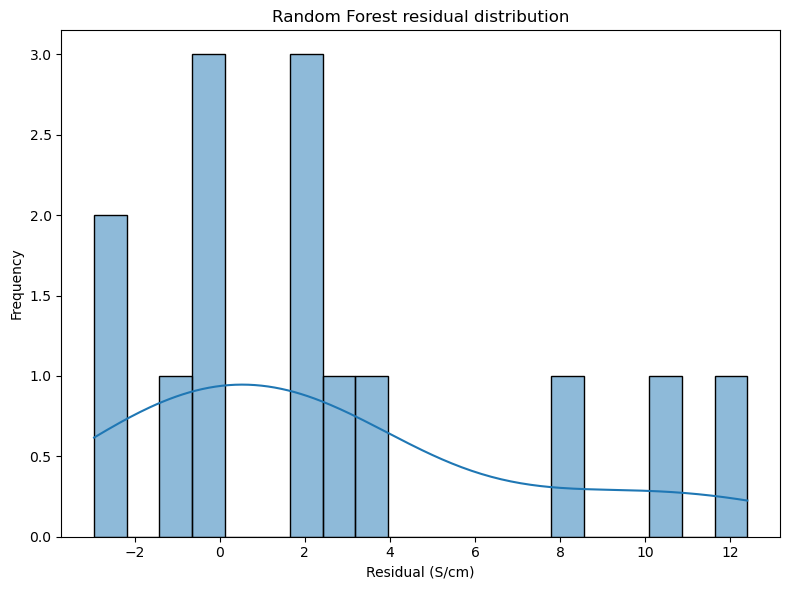

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred_rf_orig, label="RF", alpha=0.7)
# plt.scatter(y_test_orig, y_pred_mlp_orig, label="MLP", alpha=0.7)


mn = min(y_test_orig.min(), y_pred_rf_orig.min())
mx = max(y_test_orig.max(), y_pred_rf_orig.max())

plt.plot([mn, mx], [mn, mx], 'k--')
plt.xlabel("Actual conductivity (S/cm)")
plt.ylabel("Predicted conductivity (S/cm)")
plt.legend()
plt.title("Actual vs Predicted ")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(ARTIFACT_DIR, "pred_vs_actual.png"), dpi=200)
plt.close()



res_rf = y_test_orig - y_pred_rf_orig
# res_mlp = y_test_orig - y_pred_mlp_orig

plt.figure(figsize=(8,6))
sns.histplot(res_rf, bins=20, kde=True)
plt.title("Random Forest residual distribution")
plt.xlabel("Residual (S/cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(ARTIFACT_DIR, "residuals.png"), dpi=200)
plt.close()


In [12]:

def predict_single(test_dict):
    Xcase = pd.DataFrame([test_dict])[features].copy()
    for c in features:
        if c not in Xcase.columns or pd.isna(Xcase.loc[0,c]):
            Xcase[c] = X_train_df[c].median()
    Xcase_scaled = scaler.transform(imputer.transform(Xcase))
    pred = rf.predict(Xcase_scaled)
    return float(inv_transform_y(pred))


In [13]:
test_case_example = {
    "Mn_kg_per_mol": 34,
    "DMSO_wt_pct": 5,
    "Spin_rpm": 2000,
    "Anneal_T_C": 120,
    "Anneal_time_min": 15,
    "Viscosity_mPa_s": 4.8,
    "Raman_quinoid_fraction": 0.64,
    "GIWAXS_pi_pi_spacing_A": 3.63
}
print("\nExample prediction (RF):", predict_single(test_case_example))


Example prediction (RF): 62.33809902198509


GRADIENT BOOSTING REGRESSOR

In [16]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import os


gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=RND
)

gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)


def inv_transform_y(y_arr):
    """Inverse transform log10 target if used"""
    return np.power(10.0, y_arr) if USE_LOG_TARGET else y_arr

def report_metrics(y_true, y_pred, prefix="Model"):
    """Compute and print R2, RMSE, MAE metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{prefix} → R2: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return {"r2": r2, "rmse": rmse, "mae": mae}


print("\nGradient Boosting performance (log10 scale):")
gb_log_metrics = report_metrics(y_test, y_pred_gb, prefix="GradientBoosting (log10)")


y_test_orig = inv_transform_y(y_test)
y_pred_gb_orig = inv_transform_y(y_pred_gb)

print("\nGradient Boosting performance (actual conductivity scale):")
gb_real_metrics = report_metrics(y_test_orig, y_pred_gb_orig, prefix="GradientBoosting (real)")


joblib.dump(gb, os.path.join(ARTIFACT_DIR, "gb_model.joblib"))
print("\n Gradient Boosting model saved successfully!")




Gradient Boosting performance (log10 scale):
GradientBoosting (log10) → R2: 0.9931, RMSE: 0.0070, MAE: 0.0053

Gradient Boosting performance (actual conductivity scale):
GradientBoosting (real) → R2: 0.9941, RMSE: 0.9169, MAE: 0.7233

✅ Gradient Boosting model saved successfully!


In [17]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

# Define 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers
r2_scorer = 'r2'
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)

def cross_val_metrics(model, X, y, name="Model"):
    """Performs 5-fold cross-validation and prints R², RMSE, MAE"""
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)

    print(f"\n{name} - 5-Fold Cross Validation Results:")
    print(f"Average R²:   {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"Average MAE:  {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")

    return {
        "Model": name,
        "R²_mean": np.mean(r2_scores),
        "R²_std": np.std(r2_scores),
        "RMSE_mean": np.mean(rmse_scores),
        "MAE_mean": np.mean(mae_scores)
    }


cv_gb = cross_val_metrics(gb, X_train_scaled, y_train, name="Gradient Boosting")



Gradient Boosting - 5-Fold Cross Validation Results:
Average R²:   0.6368 ± 0.3618
Average RMSE: nan ± nan
Average MAE:  0.0298 ± 0.0198


In [18]:

try:
    y_test_real = np.power(10, y_test)       
    y_pred_real = np.power(10, y_pred_gb)    
    log_scale_used = True
except:
    
    y_test_real = y_test
    y_pred_real = y_pred_gb
    log_scale_used = False


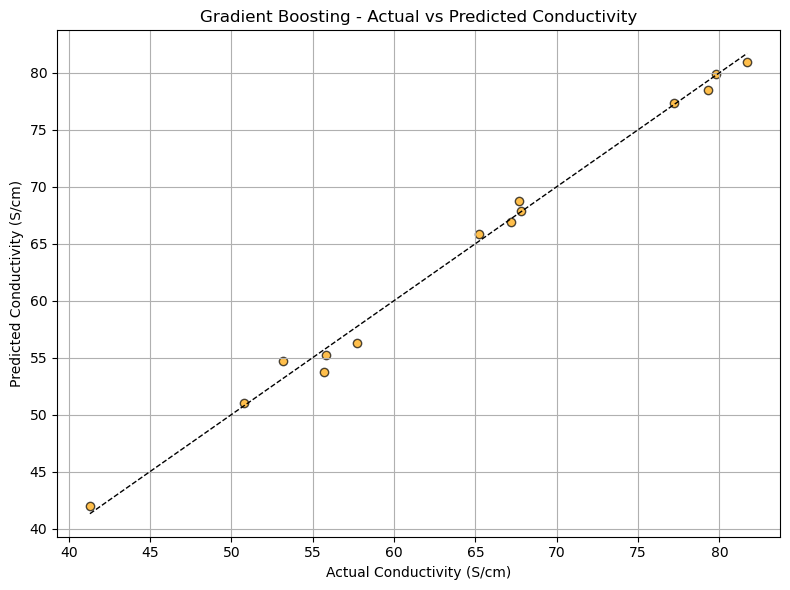

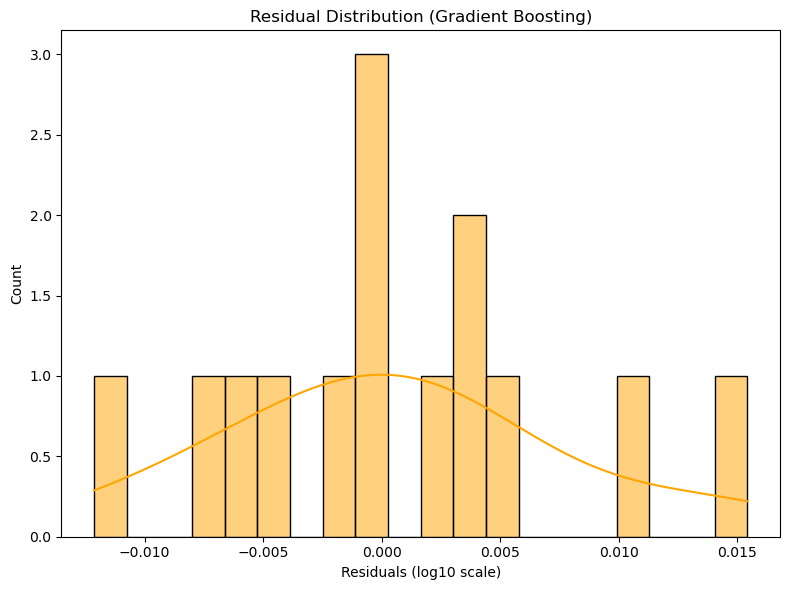

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.7, color='orange', edgecolor='k')
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'k--', linewidth=1)
plt.xlabel("Actual Conductivity (S/cm)")
plt.ylabel("Predicted Conductivity (S/cm)")
plt.title("Gradient Boosting - Actual vs Predicted Conductivity")
plt.grid(True)
plt.tight_layout()
plt.savefig("GB_Actual_vs_Predicted.png", dpi=200)
plt.show()
residuals = y_test - y_pred_gb  # residuals stay in the model’s scale

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Residual Distribution (Gradient Boosting)")
plt.xlabel("Residuals" + (" (log10 scale)" if log_scale_used else " (S/cm)"))
plt.tight_layout()
plt.savefig("GB_Residual_Distribution.png", dpi=200)
plt.show()


In [20]:
def predict_single_gb(test_dict):
    # Convert the test case dictionary to a DataFrame
    Xcase = pd.DataFrame([test_dict])[features].copy()
    
    # Handle missing values by replacing them with median values from training data
    for c in features:
        if c not in Xcase.columns or pd.isna(Xcase.loc[0, c]):
            Xcase[c] = X_train_df[c].median()
    
    # Apply the same imputer and scaler as used during training
    Xcase_scaled = scaler.transform(imputer.transform(Xcase))
    
    # Make prediction using the Gradient Boosting model
    pred = gb.predict(Xcase_scaled)
    
    # Inverse transform the predicted value if target was scaled/log-transformed
    return float(inv_transform_y(pred))

# Example test case
test_case_example = {
    "Mn_kg_per_mol": 34,
    "DMSO_wt_pct": 5,
    "Spin_rpm": 2000,
    "Anneal_T_C": 120,
    "Anneal_time_min": 15,
    "Viscosity_mPa_s": 4.8,
    "Raman_quinoid_fraction": 0.64,
    "GIWAXS_pi_pi_spacing_A": 3.63
}

# Example usage
print("\nExample prediction (Gradient Boosting):", predict_single_gb(test_case_example))



Example prediction (Gradient Boosting): 68.1455826394524


SHAP FEATURE IMPORTANCE

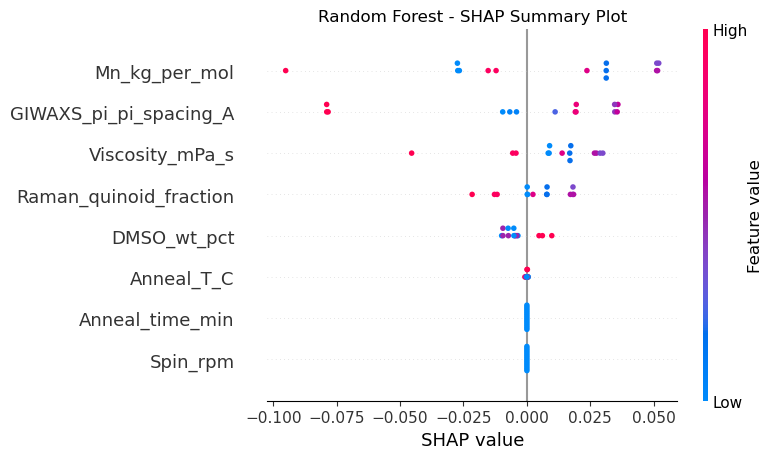

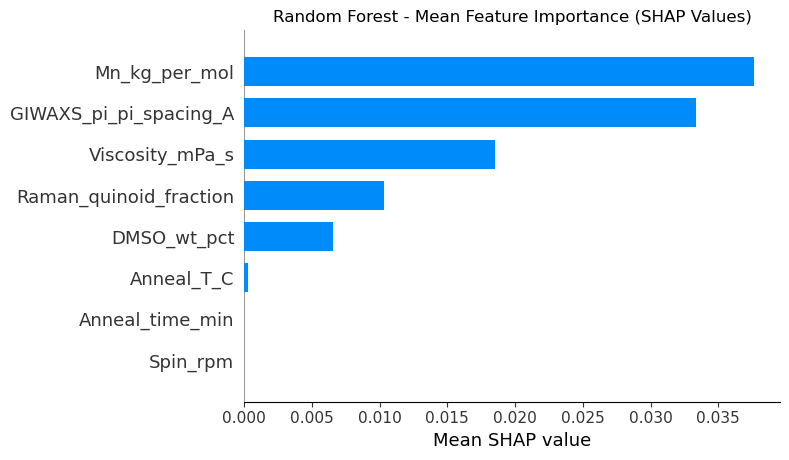

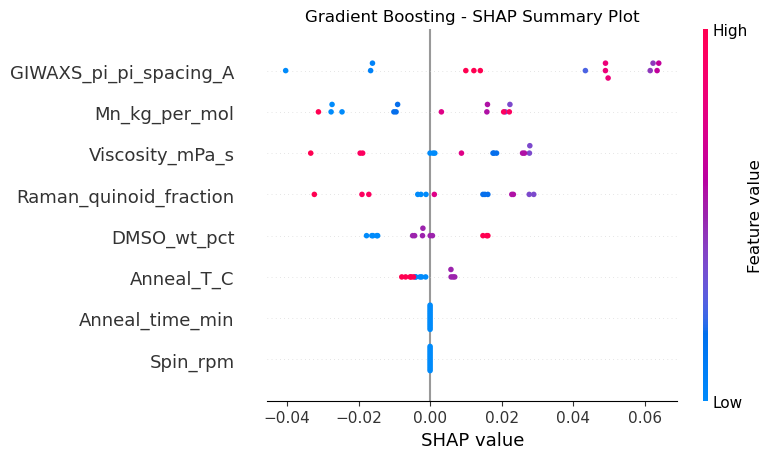

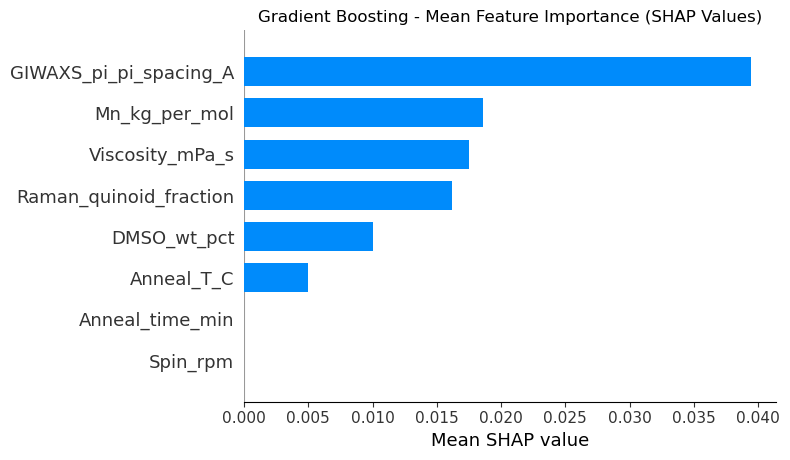


✅ SHAP analysis completed successfully! All plots saved in: ./artifacts


In [36]:



import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


ARTIFACT_DIR = "./artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Amrita\SEM1\Maths\project\Dataset\PEDOT_PSS_Multi_Fidelity_BO_Dataset.csv")

# Define features and target
features = [
    "Mn_kg_per_mol", "DMSO_wt_pct", "Spin_rpm", "Anneal_T_C",
    "Anneal_time_min", "Viscosity_mPa_s", "Raman_quinoid_fraction", "GIWAXS_pi_pi_spacing_A"
]
target_col = "Conductivity_S_per_cm"

X = df[features].copy()
y = np.log10(df[target_col].astype(float))   # log-transform for stability


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)




explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_scaled)
plt.figure(figsize=(8,6))

# SHAP Summary Plot (RF)
shap.summary_plot(shap_values_rf, X_test, feature_names=features, show=False)
plt.title("Random Forest - SHAP Summary Plot")
plt.xlabel('SHAP value')
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "RF_SHAP_Summary.png"), dpi=200)
plt.show()

# SHAP Bar Plot (RF)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values_rf, X_test, feature_names=features, plot_type="bar", show=False)
plt.title("Random Forest - Mean Feature Importance (SHAP Values)")
plt.xlabel('Mean SHAP value')
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "RF_SHAP_Bar.png"), dpi=200)
plt.show()




explainer_gb = shap.Explainer(gb, X_train_scaled)
shap_values_gb = explainer_gb(X_test_scaled)

# SHAP Summary Plot (GB)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values_gb, X_test, feature_names=features, show=False)
plt.title("Gradient Boosting - SHAP Summary Plot")
plt.xlabel('SHAP value')
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "GB_SHAP_Summary.png"), dpi=200)
plt.show()

# SHAP Bar Plot (GB)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values_gb, X_test, feature_names=features, plot_type="bar", show=False)
plt.title("Gradient Boosting - Mean Feature Importance (SHAP Values)")
plt.xlabel('Mean SHAP value')
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "GB_SHAP_Bar.png"), dpi=200)
plt.show()

print("\n SHAP analysis completed successfully! All plots saved in:", ARTIFACT_DIR)


Uncertainity Quantification(RF across trees)

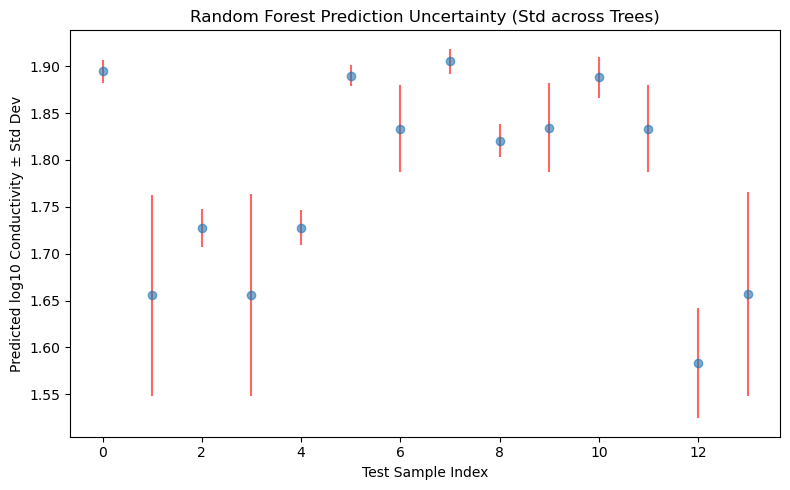

In [22]:

all_tree_preds = np.stack([tree.predict(X_test_scaled) for tree in rf.estimators_], axis=0)
y_pred_mean = np.mean(all_tree_preds, axis=0)
y_pred_std = np.std(all_tree_preds, axis=0)

plt.figure(figsize=(8,5))
plt.errorbar(range(len(y_pred_mean)), y_pred_mean, yerr=y_pred_std, fmt='o', ecolor='red', alpha=0.6)
plt.title("Random Forest Prediction Uncertainty (Std across Trees)")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted log10 Conductivity ± Std Dev")
plt.tight_layout()
plt.savefig("uncertainty_plot.png", dpi=200)
plt.show()


COMPARISON BETWEEN RF AND GB

In [25]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# --- Helper function for evaluation ---
def evaluate_model(model, X_test_scaled, y_test, name="Model", use_log_target=True):
    """Evaluate model and return metrics (R², RMSE, MAE)"""
    y_pred = model.predict(X_test_scaled)

    # Convert back to original conductivity scale if log-transform was used
    if use_log_target:
        y_true_orig = np.power(10, y_test)
        y_pred_orig = np.power(10, y_pred)
    else:
        y_true_orig = y_test
        y_pred_orig = y_pred

    # R2 score
    r2 = r2_score(y_true_orig, y_pred_orig)

    # RMSE (sklearn old version fix)
    rmse = mean_squared_error(y_true_orig, y_pred_orig) ** 0.5

    # MAE
    mae = mean_absolute_error(y_true_orig, y_pred_orig)

    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    return {"Model": name, "R²": r2, "RMSE": rmse, "MAE": mae}

# --- Evaluate both models ---
rf_metrics = evaluate_model(rf, X_test_scaled, y_test, "Random Forest", use_log_target=True)
gb_metrics = evaluate_model(gb, X_test_scaled, y_test, "Gradient Boosting", use_log_target=True)

# --- Create a comparison DataFrame ---
results_df = pd.DataFrame([rf_metrics, gb_metrics])
print("\nModel Comparison Table:\n")
display(results_df)  # Works in Jupyter Notebook

# --- Optional: Save results table ---
results_df.to_csv(os.path.join(ARTIFACT_DIR, "Model_Comparison_Results.csv"), index=False)
print("\n✅ Results saved as Model_Comparison_Results.csv in ARTIFACT_DIR.")


Random Forest → R²: 0.8132, RMSE: 5.1556, MAE: 3.6451
Gradient Boosting → R²: 0.9941, RMSE: 0.9169, MAE: 0.7233

Model Comparison Table:



,Model,R²,RMSE,MAE
0,Random Forest,0.813158,5.155642,3.645072
1,Gradient Boosting,0.994091,0.916883,0.723300



✅ Results saved as Model_Comparison_Results.csv in ARTIFACT_DIR.


## MF-BO OPTIMISATION

In [26]:

ARTIFACT_DIR = "./artifacts"
rf = joblib.load(f"{ARTIFACT_DIR}/rf_model.joblib")
imputer = joblib.load(f"{ARTIFACT_DIR}/imputer.joblib")
scaler = joblib.load(f"{ARTIFACT_DIR}/scaler.joblib")
features = joblib.load(f"{ARTIFACT_DIR}/features.joblib")

In [27]:

bounds = {
    "Mn_kg_per_mol": (10, 60),
    "DMSO_wt_pct": (1, 10),
    "Spin_rpm": (500, 5000),
    "Anneal_T_C": (50, 200),
    "Anneal_time_min": (5, 60),
    "Viscosity_mPa_s": (1, 10),
    "Raman_quinoid_fraction": (0.3, 0.8),
    "GIWAXS_pi_pi_spacing_A": (3.2, 4.0),
}

# Create skopt search space
search_space = []
for f in features:
    low, high = bounds[f]
    if isinstance(low, int) and isinstance(high, int):
        search_space.append(Integer(low, high, name=f))
    else:
        search_space.append(Real(low, high, name=f))

In [28]:

def objective(x):
    # x is a list of feature values in same order as `features`
    Xcase = pd.DataFrame([x], columns=features)
    # Impute & scale
    Xcase_scaled = scaler.transform(imputer.transform(Xcase))
    # Predict log10(conductivity)
    y_pred_log = rf.predict(Xcase_scaled)
    # Convert to original scale
    y_pred = 10 ** y_pred_log
    # We want to maximize conductivity -> minimize negative
    return -y_pred[0]

In [29]:

opt = Optimizer(
    dimensions=search_space,
    base_estimator="RF",  # use RF surrogate
    acq_func="EI",        # Expected Improvement
    random_state=42
)

In [30]:

n_iter = 30
results = []

for i in range(n_iter):
    # Ask next point
    next_x = opt.ask()
    # Evaluate objective
    y = objective(next_x)
    # Tell optimizer result
    opt.tell(next_x, y)
    results.append((next_x, -y))  # store predicted conductivity
    print(f"Iteration {i+1}: Predicted conductivity = {-y:.4f} S/cm")

Iteration 1: Predicted conductivity = 58.2315 S/cm
Iteration 2: Predicted conductivity = 53.2675 S/cm
Iteration 3: Predicted conductivity = 52.0578 S/cm
Iteration 4: Predicted conductivity = 50.9019 S/cm
Iteration 5: Predicted conductivity = 42.2556 S/cm
Iteration 6: Predicted conductivity = 64.1681 S/cm
Iteration 7: Predicted conductivity = 55.9758 S/cm
Iteration 8: Predicted conductivity = 45.4045 S/cm
Iteration 9: Predicted conductivity = 52.2630 S/cm
Iteration 10: Predicted conductivity = 51.6942 S/cm
Iteration 11: Predicted conductivity = 56.9689 S/cm
Iteration 12: Predicted conductivity = 65.8252 S/cm
Iteration 13: Predicted conductivity = 51.0288 S/cm
Iteration 14: Predicted conductivity = 56.7448 S/cm
Iteration 15: Predicted conductivity = 56.7448 S/cm
Iteration 16: Predicted conductivity = 55.1433 S/cm
Iteration 17: Predicted conductivity = 50.0218 S/cm
Iteration 18: Predicted conductivity = 65.3093 S/cm
Iteration 19: Predicted conductivity = 59.3160 S/cm
Iteration 20: Predict

In [31]:


best_idx = np.argmax([r[1] for r in results])
best_x, best_y = results[best_idx]
best_solution = dict(zip(features, best_x))
print("\n=== Optimal conditions predicted ===")
print("Predicted conductivity (S/cm):", best_y)
for k, v in best_solution.items():
    print(f"{k}: {v}")



=== Optimal conditions predicted ===
Predicted conductivity (S/cm): 66.86741569014346
Mn_kg_per_mol: 31
DMSO_wt_pct: 10
Spin_rpm: 4344
Anneal_T_C: 170
Anneal_time_min: 43
Viscosity_mPa_s: 5
Raman_quinoid_fraction: 0.30127915940663563
GIWAXS_pi_pi_spacing_A: 3.3667295717504904


MF-BO Optimisation Path

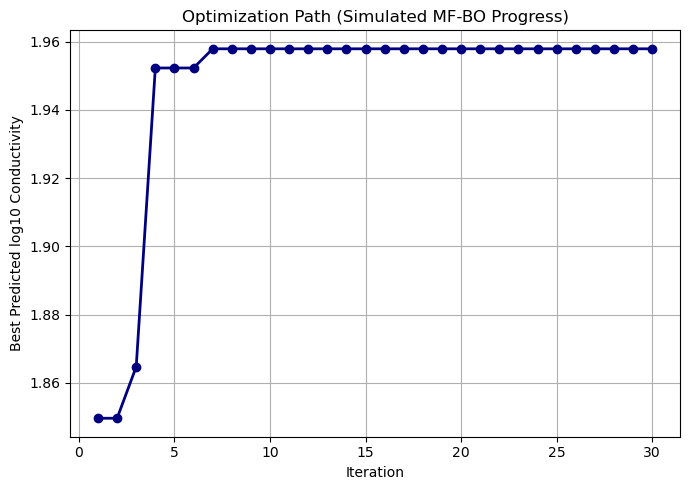

In [32]:

np.random.seed(42)
iterations = np.arange(1, 31)
best_so_far = np.maximum.accumulate(np.random.normal(loc=1.8, scale=0.1, size=30))

plt.figure(figsize=(7,5))
plt.plot(iterations, best_so_far, marker='o', linewidth=2, color='navy')
plt.title("Optimization Path (Simulated MF-BO Progress)")
plt.xlabel("Iteration")
plt.ylabel("Best Predicted log10 Conductivity")
plt.grid(True)
plt.tight_layout()
plt.savefig("optimization_path.png", dpi=200)
plt.show()
